# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/lchenhub/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [2]:
# a, import pandas
import pandas as pd

# b, import the earthquake data and store as raw_eqk
raw_eqk = pd.read_csv('data/earthquake_data.csv')

# Look at head of raw_eqk, 5 rows (0-4)
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [3]:
# a, print shape 
raw_eqk.shape  #the output is 120108 rows and 8 columns.

# print type of shape
print(type(raw_eqk.shape))  #tuple

# print only the number of rows thru shape
all_rows = raw_eqk.shape[0]  #120108 rows
all_rows


<class 'tuple'>


120108

## 3

Get the unique values of the type of events.

In [4]:
raw_eqk['type'].unique()

#unique object types include: 'earthquake', 'quarry blast', 'quarry', 'mining explosion', 'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom', 'anthropogenic event', 'acoustic noise'

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [6]:
# a, select only earthquake events
eqk = raw_eqk[raw_eqk['type']=='earthquake']
eqk

#b, set id column as index
update_eqk = eqk.set_index('id')
update_eqk

#c, check index's first 3 rows
update_eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [8]:
#get the number of rows of earthquake events, define as eqk_events
eqk_events = update_eqk.shape[0]
eqk_events

#subtract number of earthquake events from the total rows previously identified
all_rows - eqk_events

#there were 1710 events left out of raw_eqk when selecting earthquake events only.

1710

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Earthquake magnitudes'}, ylabel='Frequency'>

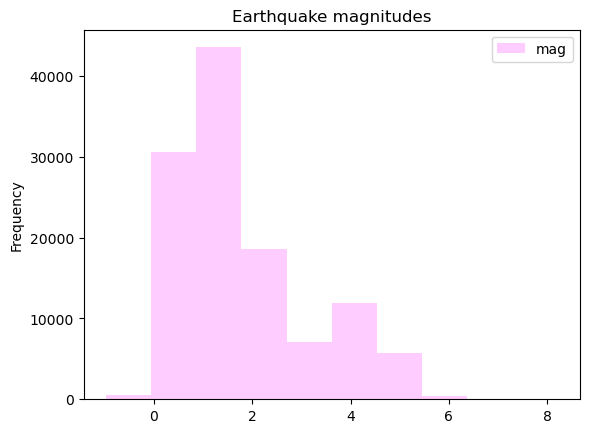

In [28]:
update_eqk.plot(kind='hist',
         x='latitude',
         y='mag',
        ylabel='magnitude',
        xlabel='latitude',
        title = 'Earthquake magnitudes', #add title
         color = 'magenta', #color
        alpha = 0.2) #transparency

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'Top 20 earthquakes by latitude'}, xlabel='latitude', ylabel='magnitude'>

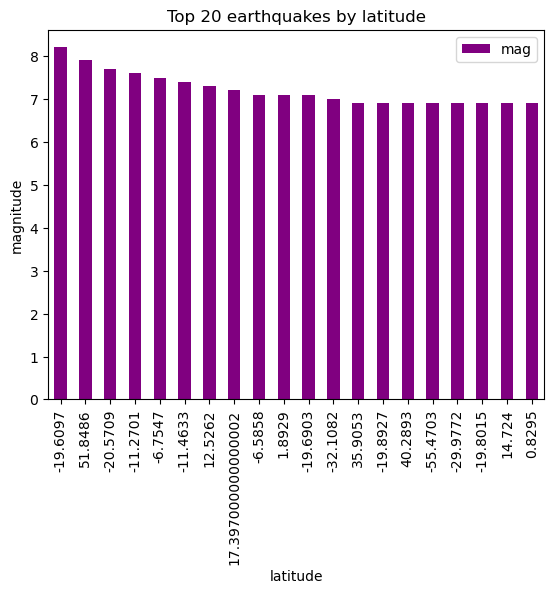

In [24]:
#a, create new variable top20 for 20 largest earthquakes by using .nlargest
top20 = update_eqk.nlargest(20, 'mag') 
top20

#b, bar plot
top20.plot(kind='bar',
          title = 'Top 20 earthquakes by latitude', #changed title
           x='latitude',
           y='mag',
          xlabel='latitude', #changed xlabel
          ylabel='magnitude', #changed y label
          color='purple') #changed color

The top20 index in the graph allows us to graph these 20 largest with their id as indicators. It also better shows the slight variations between them. If we just used the entire dataset, then the events would be indexed by a random count and we would not be able to zoom in and show the differences between them as well, since the contrast between the highest and lowest in the entire dataset is larger. 

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [71]:
#top 20 mag, place, depth
update_eqk[top20, ['mag', 'place', 'depth']]

InvalidIndexError: (id
usc000nzvd    8.2
usc000rki5    7.9
usc000p27i    7.7
usc000phx5    7.6
usb000pr89    7.5
usc000piqj    7.4
usb000slwn    7.3
usb000pq41    7.2
usc000pft9    7.1
usc000sxh8    7.1
usc000stdc    7.1
usb000sk6k    7.0
usc000mnvj    6.9
usc000nzwm    6.9
usb000r2hc    6.9
usc000rngj    6.9
usc000rkg5    6.9
usb000ruzk    6.9
usc000rr6a    6.9
usb000rzki    6.9
Name: mag, dtype: float64, ['mag', 'place', 'depth'])

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


In [72]:
# scatter plot

eqk.plot(kind='scatter',
         title='Locations of earthquakes with magnitude greater than 5'
              x='flipper_length_mm',
              y='body_mass_g',
              alpha=0.4 # controls transparency of points
             )

SyntaxError: invalid syntax (768733930.py, line 5)